In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [74]:
baltimore_Crime_data = pd.read_csv('BPD_Part_1_Victim_Based_Crime_Data (1).csv')
baltimore_Crime_data_table = pd.DataFrame(baltimore_Crime_data)
baltimore_Crime_data_table.head()

,CrimeDate,CrimeTime,CrimeCode,Location,Description,Weapon,Post,District,Neighborhood,Location 1,Total Incidents
0,09/24/2012,00:00:00,9S,2100 VINE ST,Outside,FIREARM,714.0,WESTERN,Penrose/Fayette Street Outreach,"(39.2899300000, -76.6503900000)",1
1,01/07/2016,23:59:00,9S,700 E EAGER ST,Inside,FIREARM,311.0,EASTERN,Johnston Square,"(39.3013900000, -76.6071300000)",1
2,06/15/2015,23:59:00,1F,2700 HARLEM AV,Outside,FIREARM,721.0,WESTERN,Mosher,"(39.2955400000, -76.6617100000)",1
3,09/12/2014,23:59:00,9S,4000 PALL MALL RD,Inside,FIREARM,533.0,NORTHERN,Greenspring,"(39.3356800000, -76.6599800000)",1
4,06/15/2013,23:59:00,9S,400 BRUNSWICK ST,Outside,FIREARM,841.0,SOUTHWESTERN,Millhill,"(39.2806100000, -76.6601500000)",1


In [75]:
baltimore_Crime_data_table.tail()

,CrimeDate,CrimeTime,CrimeCode,Location,Description,Weapon,Post,District,Neighborhood,Location 1,Total Incidents
264491,01/05/2011,00:00:00,7A,4100 BRENDAN AV,O,NaN,432.0,NORTHEASTERN,Belair-Edison,"(39.3141400000, -76.5664700000)",1
264492,01/04/2011,00:00:00,4E,5500 BOWLEYS LA,I,HANDS,443.0,NORTHEASTERN,Frankford,"(39.3189200000, -76.5516100000)",1
264493,01/02/2011,00:00:00,6D,3700 BANCROFT RD,O,NaN,632.0,NORTHWESTERN,Glen,"(39.3589600000, -76.6993600000)",1
264494,01/01/2011,00:00:00,6G,0 E CROSS ST,I,NaN,942.0,SOUTHERN,Federal Hill,"(39.2769600000, -76.6133800000)",1
264495,01/01/2011,00:00:00,6E,2700 HARLEM AV,O,NaN,721.0,WESTERN,Mosher,"(39.2956000000, -76.6615600000)",1


In [76]:
baltimore_Crime_data_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264496 entries, 0 to 264495
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CrimeDate        264496 non-null  object 
 1   CrimeTime        264496 non-null  object 
 2   CrimeCode        264496 non-null  object 
 3   Location         262692 non-null  object 
 4   Description      260445 non-null  object 
 5   Weapon           89833 non-null   object 
 6   Post             264286 non-null  float64
 7   District         264435 non-null  object 
 8   Neighborhood     262623 non-null  object 
 9   Location 1       262694 non-null  object 
 10  Total Incidents  264496 non-null  int64  
dtypes: float64(1), int64(1), object(9)
memory usage: 22.2+ MB


In [77]:
baltimore_Crime_data_table_2 = baltimore_Crime_data_table.query('CrimeDate.str.contains("2016")', engine='python')

In [78]:
baltimore_Crime_data_table.drop(labels = baltimore_Crime_data_table_2.index.values , axis = 0, inplace = True)

In [79]:
print(sum(baltimore_Crime_data_table['Total Incidents']))

244423


In [80]:
District_wise_collect = baltimore_Crime_data_table.groupby(['District'] ).sum()

In [81]:
District_wise_collect.reset_index(inplace=True)

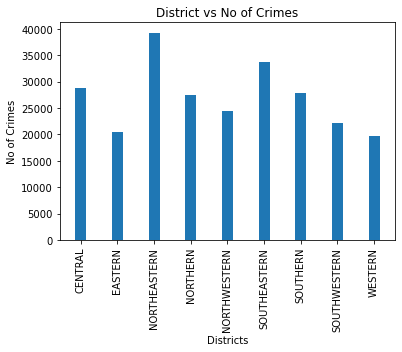

In [126]:
plt.bar(District_wise_collect['District'], District_wise_collect['Total Incidents'], width = 0.3)
plt.xticks(rotation=90)
plt.title('District vs No of Crimes')
plt.ylabel('No of Crimes')
plt.xlabel('Districts')
plt.show()

<b>These are the number of crimes in each District of Baltimore</b>

In [83]:
weapons_used = baltimore_Crime_data_table.groupby(['Weapon']).sum()
weapons_used.reset_index(inplace=True)


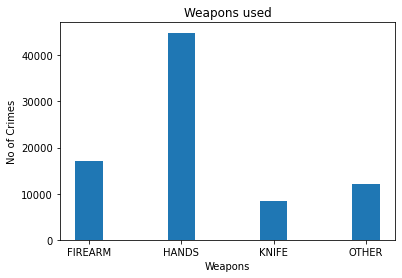

In [84]:
plt.bar(weapons_used['Weapon'],weapons_used['Total Incidents'], width = 0.3)
plt.title('Weapons used')
plt.ylabel('No of Crimes')
plt.xlabel('Weapons')
plt.show()

<b>Most of the Crimes are comitted by Hands</b>

In [85]:
Crime_code = baltimore_Crime_data_table.groupby(['CrimeCode']).sum()
Crime_code.reset_index(inplace = True)

In [86]:
max_crime = Crime_code.loc[Crime_code['Total Incidents'] == max(Crime_code['Total Incidents'])]
min_crime = Crime_code.loc[Crime_code['Total Incidents'] == min(Crime_code['Total Incidents'])]

In [87]:
Crimecode_list = max_crime['CrimeCode'].to_list()
Crimecode_list1 = min_crime['CrimeCode'].to_list()
final_Crimecode_list = Crimecode_list + Crimecode_list1

In [88]:
Crime_Incidents = max_crime['Total Incidents'].to_list()
Crime_Incidents1 = min_crime['Total Incidents'].to_list()
final_Incidents_list = Crime_Incidents +  Crime_Incidents1

In [89]:
Crime_by_Neighbourhood = baltimore_Crime_data_table.groupby(['Neighborhood']).sum()
Crime_by_Neighbourhood.reset_index(inplace = True)
Crime_by_Neighbourhood.columns = Crime_by_Neighbourhood.columns.str.replace(' ', '')
max_Crime_neighbourhood = Crime_by_Neighbourhood.loc[Crime_by_Neighbourhood['TotalIncidents'] == max(Crime_by_Neighbourhood['TotalIncidents'])]
min_Crime_neighbourhood = Crime_by_Neighbourhood.loc[Crime_by_Neighbourhood['TotalIncidents'] == min(Crime_by_Neighbourhood['TotalIncidents'])]

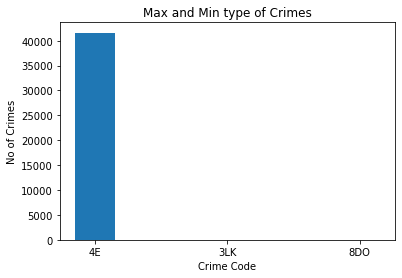

In [90]:
plt.bar(final_Crimecode_list,final_Incidents_list, width = 0.3)
plt.title('Max and Min type of Crimes')
plt.ylabel('No of Crimes')
plt.xlabel('Crime Code')
plt.show()

<b>The maximum type of crime is 4E , and minimum are 3LK and 8DO</b>

In [91]:
print('The maximum Crime takes place in', max_Crime_neighbourhood['Neighborhood'].iloc[0], 'Neighbourhood ' 'and the total no of crimes are',max_Crime_neighbourhood['TotalIncidents'].iloc[0])

The maximum Crime takes place in Downtown Neighbourhood and the total no of crimes are 8194


In [92]:
print('The minimum Crime and safest Neighbourhood is', min_Crime_neighbourhood['Neighborhood'].iloc[0], 'and the total no of crimes are',min_Crime_neighbourhood['TotalIncidents'].iloc[0])

The minimum Crime and safest Neighbourhood is Dundalk Marine Terminal and the total no of crimes are 1


In [93]:
print('To view all the data please execute this cell')
#Crime_by_Neighbourhood

To view all the data please execute this cell


In [94]:
baltimore_Crime_data_table['dateandtime'] = baltimore_Crime_data_table['CrimeDate'] + baltimore_Crime_data_table['CrimeTime']


In [95]:
baltimore_Crime_data_table['dateandtime'] = pd.to_datetime(baltimore_Crime_data_table['dateandtime'],format = '%m/%d/%Y%H:%M:%S')

In [96]:
baltimore_Crime_data_table['dateandtime'] = baltimore_Crime_data_table['dateandtime'].replace(['08/03/20110'],'08/03/201100:00:00')

In [97]:
#baltimore_Crime_data_table.set_index(keys = 'dateandtime',inplace = True)

In [98]:
baltimore_Crime_data_table.sort_values(['dateandtime'],axis = 0,ascending=False, inplace = True)

In [99]:
Incident_Description = baltimore_Crime_data_table.groupby(['Description']).sum()

In [100]:
Incident_Description.reset_index()

,Description,Post,Total Incidents
0,I,62256369.0,122854
1,Inside,295577.0,571
2,O,56687727.0,114224
3,Outside,1598616.0,2788


In [101]:
inside_Dataframe = Incident_Description.iloc[[0, 1]].reset_index()
outside_Dataframe =Incident_Description.iloc[[2, 3]].reset_index()

In [102]:
Total_outside = outside_Dataframe['Total Incidents'].sum()
Total_inside = inside_Dataframe['Total Incidents'].sum()

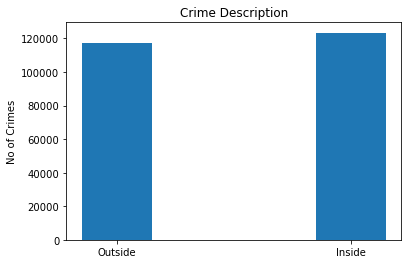

In [103]:
plt.bar(['Outside','Inside'],[Total_outside,Total_inside], width = 0.3 , align = 'center')
plt.title('Crime Description')
plt.ylabel('No of Crimes')
plt.show()

In [104]:
baltimore_Crime_data_table['CrimeTime'] = pd.to_datetime(baltimore_Crime_data_table['CrimeTime'],format = '%H:%M:%S')
#baltimore_Crime_data_table['CrimeTime'] = baltimore_Crime_data_table['CrimeTime'].replace(['0'],'00:00:00')

In [105]:
baltimore_Crime_data_table['hour'] = baltimore_Crime_data_table['CrimeTime'].dt.hour

In [106]:
Most_crime_happen_at = baltimore_Crime_data_table.groupby(['hour']).sum()

In [107]:
Most_crime_happen_at.reset_index(inplace = True)

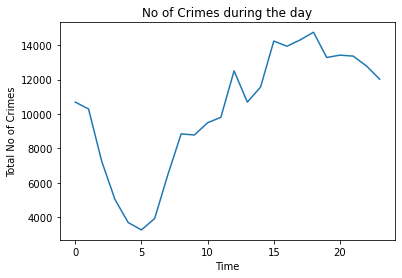

In [108]:
plt.plot(Most_crime_happen_at['hour'],Most_crime_happen_at['Total Incidents'])
plt.xlabel('Time')
plt.ylabel('Total No of Crimes')
plt.title('No of Crimes during the day')
plt.show()

In [109]:
baltimore_Crime_data_table['Year'] = baltimore_Crime_data_table['dateandtime'].dt.year

In [110]:
Year_wise_data = baltimore_Crime_data_table.groupby(['Year']).sum()

In [111]:
Year_wise_data.reset_index(inplace = True)

In [112]:
Year_wise_data.drop(['hour'], inplace = True, axis = 1)

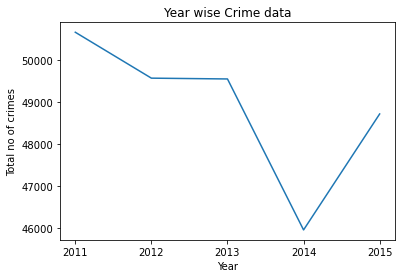

In [120]:
x = Year_wise_data['Year']
values = [2011,2012,2013,2014,2015]
plt.plot(Year_wise_data['Year'],Year_wise_data['Total Incidents'])
plt.title('Year wise Crime data')
plt.xlabel('Year')
plt.xticks(x,values)
plt.ylabel('Total no of crimes')
plt.show()

In [121]:
Neighbourhood_year_data = baltimore_Crime_data_table.groupby(['Neighborhood','Year']).sum()

In [122]:
Neighbourhood_year_data.reset_index()

,Neighborhood,Year,Post,Total Incidents,hour
0,Abell,2011,46170.0,90,1124
1,Abell,2012,65151.0,127,1645
2,Abell,2013,58995.0,115,1526
3,Abell,2014,75924.0,148,1799
4,Abell,2015,56430.0,110,1444
...,...,...,...,...,...
1379,York-Homeland,2011,7815.0,15,197
1380,York-Homeland,2012,12504.0,24,326
1381,York-Homeland,2013,14588.0,28,338
1382,York-Homeland,2014,15630.0,30,403


In [123]:
Neighbourhood_year_data.reset_index(inplace = True)

In [124]:
def mapping(Neighbourhood):
    if Neighbourhood in Neighbourhood_year_data['Neighborhood'].tolist():
        yo = list(set(Neighbourhood_year_data['Year']))
        yo.sort()
        list_index = Neighbourhood_year_data.index[Neighbourhood_year_data['Neighborhood'] == Neighbourhood].tolist()
        plt.bar(yo ,Neighbourhood_year_data['Total Incidents'][list_index].tolist())
    else:
        return False

Write the Neighbourhood for which you want yearly data for Abell


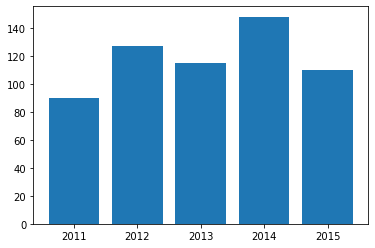

In [125]:
Neighbor = input('Write the Neighbourhood for which you want yearly data for')
mapping(Neighbor)